In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [3]:
mnist = tf.keras.datasets.mnist

mnist is the dataset from keras an api of tensorflow of handwritten digits 

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

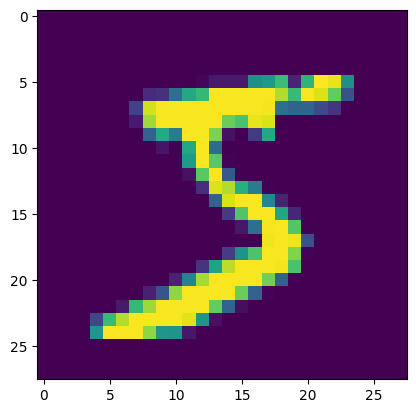

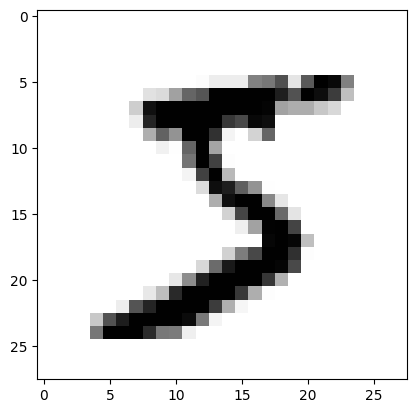

In [6]:
plt.imshow(x_train[0])
plt.show()  # to keep showing the original image
# we dont know if the image is colored or what so we convert it to black and white thats binary
plt.imshow(x_train[0], cmap=plt.cm.binary)


Normalizing the data as the values are from 0 to 255 255 being used for white

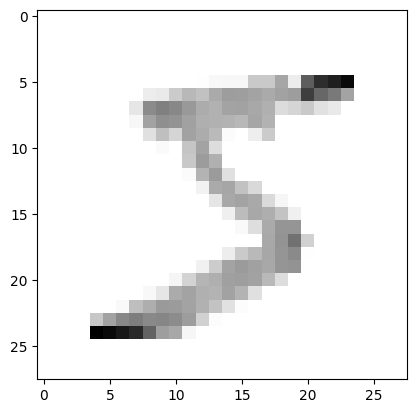

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)


In [10]:
print(x_train[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Adding an extra dimention to the train and test data before convolution
for using kernal or filter

In [11]:
img_size = 28
x_trainr = np.array(x_train).reshape(-1, img_size, img_size, 1)
x_testr = np.array(x_test).reshape(-1, img_size, img_size, 1)
x_train.shape


(60000, 28, 28)

Creating a deep neural network 
sequential will connect different layers

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [13]:
model = Sequential()
model.add(Conv2D(6, (3, 3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(400))
model.add(Activation("relu"))

model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))


In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 activation (Activation)     (None, 26, 26, 6)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 activation_1 (Activation)   (None, 11, 11, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                    

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="Adam", metrics=['accuracy'])


In [18]:
print(len(x_trainr))
print(len(y_train))


60000
60000


In [22]:
print(len(x_trainr))
model.fit(x_trainr, y_train, epochs=5, shuffle=True,
          batch_size=32, validation_split=0.3)


60000
Epoch 1/5
1313/1313 [==============================] - 14s 10ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.0709 - val_accuracy: 0.9838
Epoch 2/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.0777 - val_accuracy: 0.9837
Epoch 3/5
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.0675 - val_accuracy: 0.9850
Epoch 4/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0753 - val_accuracy: 0.9843
Epoch 5/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0810 - val_accuracy: 0.9836


In [23]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print(test_loss)
print(test_acc)


313/313 [==============================] - 2s 5ms/step - loss: 0.0745 - accuracy: 0.9845
0.07452673465013504
0.984499990940094


In [24]:
from tensorflow.keras.models import load_model

model.save('hdr_model.h5')
